In [1]:
from cs103 import *
from typing import *

def convert_num_to_col(size: int, n: int) -> Image:
    """
    Converts a number into a square of the appropriate color
    Variation of colors: white, red, orange, yellow, green, cyan, blue, darkblue, purple, black
    Note: n should be in the range of (0, 255)
    """
    step = 25
    if (n < step):
        return square(size, "solid", "black")
    elif (n < step * 2):
        return square(size, "solid", "purple")
    elif (n < step * 3):
        return square(size, "solid", "darkblue")
    elif (n < step * 4):
        return square(size, "solid", "blue")
    elif (n < step * 5):
        return square(size, "solid", "cyan")
    elif (n < step * 6):
        return square(size, "solid", "lightgreen")
    elif (n < step * 7):
        return square(size, "solid", "yellow")
    elif (n < step * 8):
        return square(size, "solid", "orange")
    elif (n < step * 9):
        return square(size, "solid", "red")
    else:
        return square(size, "solid", "white")
    

def main(size: int, lon: List[int]) -> Image:
    """
    Takes in a list of 32 * 24 ints, converts it into an Image
    """
    #return square(10, "solid", "white")
    row = 1
    acc = square(size, "solid", "white")
    one_row = square(size, "solid", "white")
    for i in range(0, len(lon)):
        if (i < 32 * row):
            one_row = beside(one_row, convert_num_to_col(size, lon[i]))
        if (i == (32 * row)-1): # prep or next row
            acc = above(acc, one_row)
            row = row + 1
            one_row = square(size, "solid", "white") # reset row accumultor

    return acc

In [30]:
def create_arr(positions: List[int]):
    """
    Takes in a list of ints corresponding to the position of the hot object
    Returns an Image of the hot object (immitating an infrared camera)
    Note: This takes into consideration of the smoothing out effect
    """
    acc = [] 
    for i in range(0, 32*24):
        if (i in positions): # hot objects
            acc.append(250)
        #elif (i+1 in positions or i-1 in positions):
        elif (i+1 in positions or i-1 in positions 
              or (i > 32 and (i-32) in positions) or (i < 32*23 and (i+32) in positions)):
            acc.append(220)
        #elif (i+2 in positions or i-2 in positions):
        elif (i+2 in positions or i-2 in positions 
              or (i > 32 and i-31 in positions) or (i < 32*23 and i+31 in positions)
              or (i > 32 and i-33 in positions) or (i < 32*23 and i+33 in positions)
              or (i > 64 and i-64 in positions) or (i < 32*22 and i+64 in positions)):
            acc.append(190)
        elif (i+3 in positions or i-3 in positions 
              or (i > 32 and i-30 in positions) or (i < 32*23 and i+30 in positions)
              or (i > 32 and i-34 in positions) or (i < 32*23 and i+34 in positions)):
            acc.append(140)
        elif (i+4 in positions or i-4 in positions):
            acc.append(120)
        elif (i+5 in positions or i-5 in positions):
            acc.append(50)
        else:
            acc.append(0)
        
            
    return acc

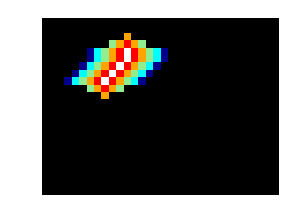

In [39]:
horizontal = 5
vertical_step = 4
vertical = vertical_step*32

arr_input = [16+vertical-horizontal, 48+vertical-horizontal, 79+vertical-horizontal,
                     110+vertical-horizontal, 141+vertical-horizontal]
main(10, create_arr(arr_input))

#main(20, create_arr([368]))

#create_arr(arr_input)

#arr_input



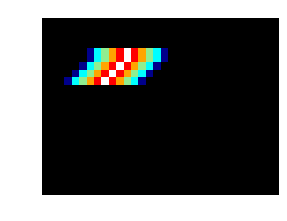

In [34]:
# For comparing against array created by the C code
# ========================== From main.c ==========================
# int position[5] = {139, 171, 202, 233, 264}; // THIS IS INPUT! 
# int acc[768];
# for (int a = 0; a < 768; a++ ) {
#    acc[a] = 0;
#    for (int i = 0; i < sizeof(position) / sizeof(position[0]); i++) {
#        if (position[i] == a) {
#            acc[a] = 250;
#            break;
#        }
#        else if (a + 1 == position[i] || a - 1 == position[i]) {
#            acc[a] = 220;
#            break;
#        }
#        else if (a + 2 == position[i] || a - 2 == position[i]) {
#            acc[a] = 190;
#            break;
#        }
#        else if (a + 3 == position[i] || a - 3 == position[i]) {
#            acc[a] = 140;
#            break;
#        }
#        else if (a + 4 == position[i] || a - 4 == position[i]) {
#            acc[a] = 120;
#            break;
#        }
#        else if (a + 5 == position[i] || a - 5 == position[i]) {
#            acc[a] = 50;
#            break;
#        }
#    }

# }

main(10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 140, 190, 220, 250, 220, 190, 140, 120, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 140, 190, 220, 250, 220, 190, 140, 120, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 140, 190, 220, 250, 220, 190, 140, 120, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 140, 190, 220, 250, 220, 190, 140, 120, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 140, 190, 220, 250, 220, 190, 140, 120, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0])

In [ ]:
def hotRegion(array: List[int]):
    """
    Takes in an array of (32 * 24) ints
    Split up the matric into 3 sections, (1) RIGHT: column 1-11, (2) MIDDLE: column 12- 21 (2) LEFT: column 22-32
    Return 1 if RIGHT is hottest, -1 if LEFT is hottest, 0 if MIDDLE is hottest
    """
    right = 0
    left = 0
    middle = 0
    